In [11]:
import json
import projetannuel
import random

with open("../dataset/images_flat_full.json", "r") as dataset:
    data = json.load(dataset)

# random.shuffle(data)
data_binary = [img for img in data if img["genre"] in ['Animation', 'Horreur']]
random.shuffle(data_binary)
print(len(data_binary))
# data = data[:2000]

imgs_as_lists = [movie["image"] for movie in data_binary]
genres = [movie["genre"] for movie in data_binary]

1998


In [12]:
lim = int(len(data_binary) * 0.8)
imgs_as_lists_train = imgs_as_lists[:lim]
genres_train = genres[:lim]
imgs_as_lists_test = imgs_as_lists[lim:]
genres_test = genres[lim:]

In [13]:
import projetannuel

y = projetannuel.string_labels(genres_train)

model = projetannuel.LinearModel(
    imgs_as_lists_train,
    y
)

In [14]:
model.train_classification(epochs=50_000, learning_rate=0.05, x_test=imgs_as_lists_test, y_test=projetannuel.string_labels(genres_test))

In [21]:
model.save("../saved_model/linear_images_20x30_2000im_50000ep_0-05lr.json")

In [16]:
y_pred = []
for img in imgs_as_lists_test:
    y_pred.append(model.predict(img))

In [17]:
print(y_pred)

['Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Ho

In [18]:
projetannuel.accuracy_score(genres_test, y_pred)

0.6375

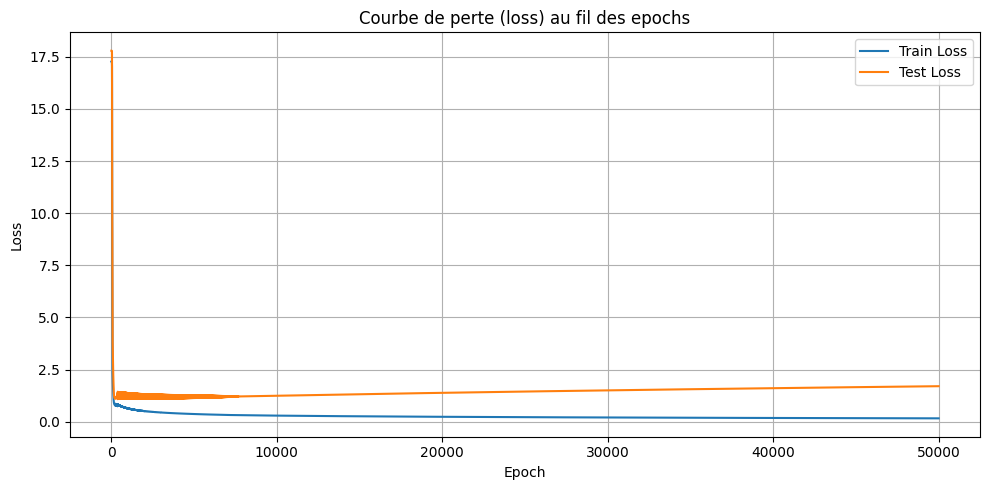

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.train_loss, label='Train Loss')
plt.plot(model.test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
rfeds

NameError: name 'rfeds' is not defined

## MLP

In [ ]:
genres_binary_train = [[0] if x=="Animation" else [1] for x in genres_train]

In [ ]:
import projetannuel as pa
model = pa.MLP([1800, 4, 1])
model.train(imgs_as_lists_train,genres_binary_train,1_000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists_test]

In [ ]:
y_pred_train = [model.predict(x, True)[0] for x in imgs_as_lists_train]

In [ ]:
model.save("../saved_model/mlp_images_20x30_2000im_6-4-1npl_1000ep_0-01lr.json")

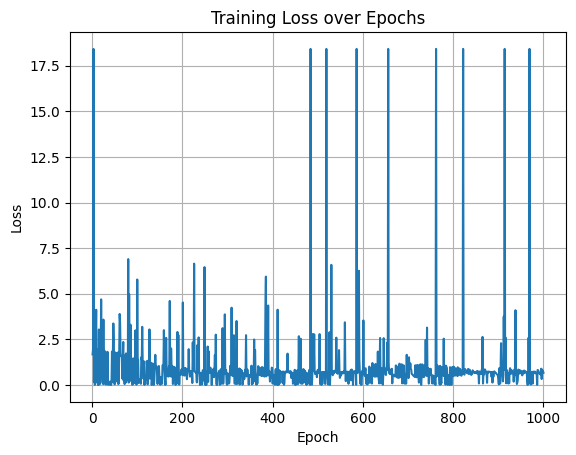

In [ ]:
import matplotlib.pyplot as plt

# noraml car affiche pas par epochs

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [ ]:
genres_binary_test = [0 if x=="Animation" else 1 for x in genres_test]

In [ ]:
genres_binary_train = [0 if x=="Animation" else 1 for x in genres_train]

In [ ]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

101

In [ ]:
y_pred_train = [0 if x<0.5 else 1 for x in y_pred_train]

In [ ]:
pa.accuracy_score(genres_binary_train, y_pred_train)

0.639549436795995

# RBF

In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [ ]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_as_lists,
#         y,
#         gamma = gamma,
#         k = c
#     )
#     model.train_classification(epochs=10_000, learning_rate=0.01, algo="gradient-descent")
#     Y_pred = [model.predict(x) for x in imgs_as_lists]
#     acc = projetannuel.accuracy_score(genres, Y_pred)
    
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

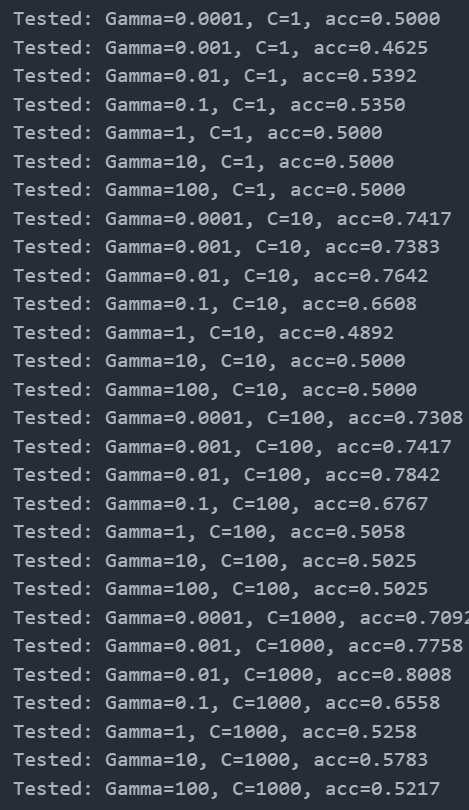

In [ ]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.01,
    k = 120
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in imgs_as_lists_test]

# print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

In [ ]:
projetannuel.accuracy_score(genres_test, Y_pred)

0.7475

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'builtins.RBF' object has no attribute 'loss'

<Figure size 1000x500 with 0 Axes>

# SVM

In [ ]:
from projetannuel import SVM, SVMKernelType, SoftMargin

In [ ]:
genres_binary_train = [-1 if x=="Animation" else 1 for x in genres_train]
genres_binary_test = [-1 if x=="Animation" else 1 for x in genres_test]

In [ ]:
model = SVM(SVMKernelType.rbf(0.1),SoftMargin.Soft(5))
model.train(imgs_as_lists_train, genres_binary_train)

OSQP status   = Solved(Solution { x: [0.9739942484391106, 0.9876306337459678, 0.9742834176793036, 0.7828046186908795, 0.9742851708770022, 0.9740110978128517, 1.0256942180353497, 1.0219555847333057, 0.9867185987036451, 0.9742841941775287, 0.9742954064257059, 0.9742803335598951, 0.9740228737060705, 0.973289577486885, 1.0209686291468412, 1.0018489994506103, 0.9742869480641282, 0.9742781548895142, 1.0109403489003495, 0.9742321242272973, 1.025704541974149, 0.9742946677698924, 0.9740028518108961, 1.024573162766581, 1.017482283007498, 0.6915743610343181, 0.7271518329378562, 1.0218140694867106, 0.9742961720316962, 0.9742655156498915, 0.5829151929302693, 0.9742657525398957, 0.9743208854628842, 0.9322624204364691, 0.9742422336156501, 1.0257037060813485, 0.980657274962672, 0.9741212360821366, 1.0258367364625924, -3.716338385629865e-22, 1.0235042601357958, 1.0238492098100587, 0.9742628508881261, 1.0257055663732866, 0.9738284519736465, 0.9735678016761812, 1.0204683987139198, 0.7011123368619145, 1.0

In [ ]:
Y_pred = [model.predict([x])[0] for x in imgs_as_lists_test]
print(f"Accuracy Score : {projetannuel.accuracy_score(genres_binary_test, Y_pred)}")

Accuracy Score : 0.625


In [ ]:
Y_pred.count(-1)

342

In [ ]:
genres_binary_test.count(-1)

194